# HAM10000 Dataset Exploratory Data Analysis
## Dataset Info:
Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).


In [1]:
!pwd

/mnt/c/Users/Hasib Ahmed/notebooks/melanoma_classification


## Run these commands in terminal (requires password) everytime to mount external HDD as D drive so Jupyter can access it

```sudo mkdir /mnt/d```

(above not needed if directory is already created)

```sudo mount -t drvfs D: /mnt/d```


In [17]:
import os
from fastai import *
from fastai.vision import *
import pandas as pd
import seaborn as sns

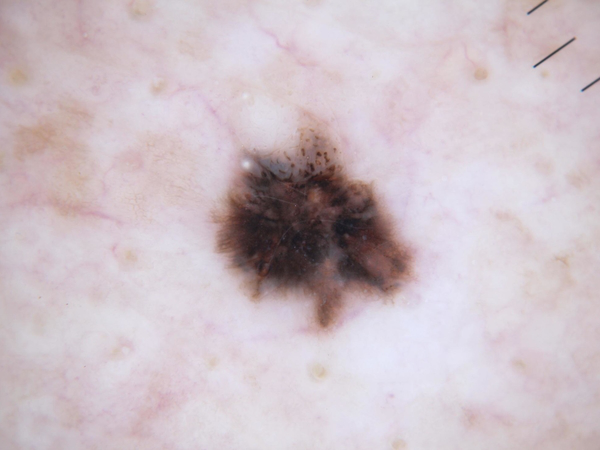

In [18]:
# I have merged images from both folders (HAM10000_images_part1.zip and HAM10000_images_part2.zip into one directory (ham10000))
# Test to see if drive is successfully mounted and jupyter can access.
path = Path('/mnt/d/Storage/ham10000')
img = open_image(path/'/mnt/d/Storage/ham10000/ISIC_0032232.jpg')
# Below print stmt instead of viewing img
# print(os.listdir(path))
img

In [19]:
# path to CSV file we need
csv_file = path/'HAM10000_metadata.csv'

In [20]:
# Categories of the diferent diseases
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

In [21]:
df = pd.read_csv(csv_file).set_index('image_id')
df.head()

,lesion_id,dx,dx_type,age,sex,localization
image_id,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear


In [31]:
df.dx = df.dx.astype('category', copy=True)
df['labels'] = df.dx.cat.codes # Convert the labels to numbers
df['lesion'] = df.dx.map(lesion_type_dict)
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df.head()

,lesion_id,dx,dx_type,age,sex,localization,labels,lesion,cell_type
image_id,,,,,,,,,
ISIC_0027419,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis,Benign keratosis
ISIC_0025030,HAM_0000118,bkl,histo,80.0,male,scalp,2,Benign keratosis,Benign keratosis
ISIC_0026769,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis,Benign keratosis
ISIC_0025661,HAM_0002730,bkl,histo,80.0,male,scalp,2,Benign keratosis,Benign keratosis
ISIC_0031633,HAM_0001466,bkl,histo,75.0,male,ear,2,Benign keratosis,Benign keratosis


In [32]:
# Categories of the diferent diseases in the dataset
df.dx.cat.categories

Index(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='object')

In [33]:
df.loc['ISIC_0027429','lesion']

'Melanocytic nevi'

In [34]:
print(df.lesion.value_counts())

Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: lesion, dtype: int64


####  Here we can see that the dataset has imbalanced classes. To make it more visual we will creae a infographic (count plot) below

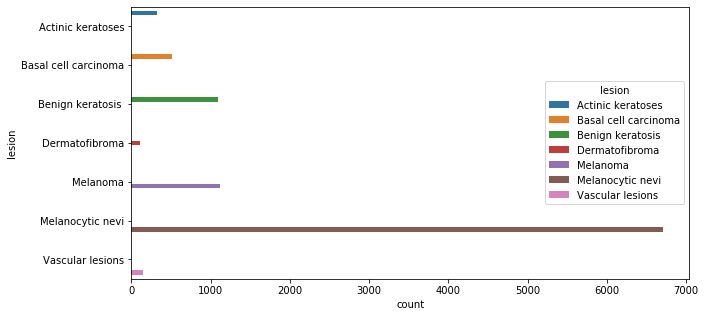

In [40]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
sns.countplot(y = 'lesion', data = df, hue = "lesion", ax = ax1)

#### From the above count plot we can see that Melanocytic Nevi has a higher proportion of instances compared to the other lesion types

Plotting of ground truth which is 'dx_type' to see the distribution of the 4 categories within this dataset. The catergories are as follows:

1. Histopathology (Histo): Histopathologic diagnoses of excised lesions have been performed by specialized dermatopathologists.

2. Confocal: Reflectance confocal microscopy is an in-vivo imaging technique with a resolution at near-cellular level, and some facial benign keratoses were verified by this method

3. Follow-up: If nevi monitored by digital dermatoscopy did not show any changes during 3 follow-up visits or 1.5 years we accepted this as evidence of biologic benignity. Only nevi, but no other benign diagnoses were labeled with this type of ground-truth because dermatologists usually do not monitor dermatofibromas, seborrheic keratoses, or vascular lesions. The presence of change was assessed by author HK who has more than 20 years of experience in digital dermatoscopic follow-up

4. Consensus: For typical benign cases without histopathology or followup biologists provide an expert-consensus rating of authors PT and HK. They applied the consensus label only if both authors independently gave the same unequivocal benign diagnosis. Lesions with this type of groundtruth were usually photographed for educational reasons and did not need further follow-up or biopsy for confirmation.

Information taken from from the [relevant paper](https://www.nature.com/articles/sdata2018161).

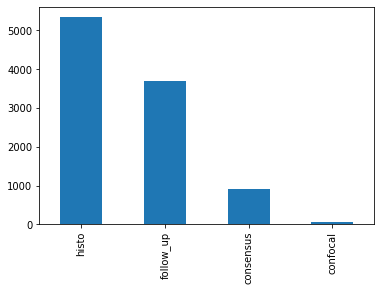

In [41]:
df['dx_type'].value_counts().plot(kind='bar')

#### Now to plot the distribution of localisation field of the lesion

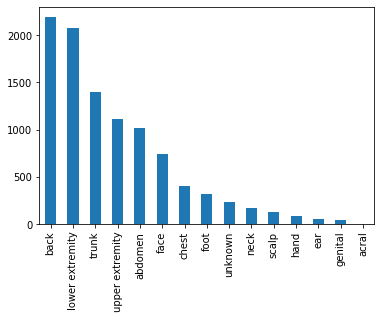

In [43]:
df['localization'].value_counts().plot(kind='bar')

#### From the bar chart above, back, lower extremity, trunk, upper extremity and abdoment are the most heavily affected areas for skin cancer in this dataset

#### Now plotting the age distribution

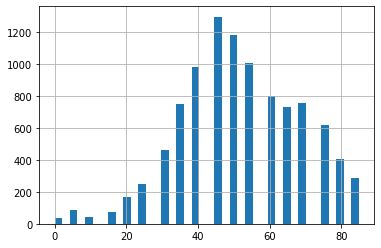

In [59]:
df['age'].hist(bins=40)

#### From this chart we can see that there is larger instances of patients being of the age 30 to 60
#### Now plotting the gender distribution

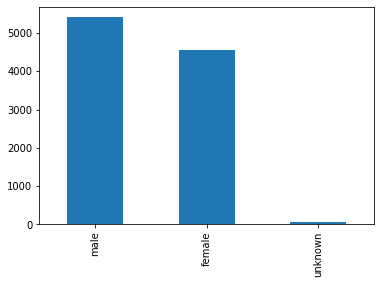

In [60]:
df['sex'].value_counts().plot(kind='bar')

#### Now to visualise age-wise distribution of skin cancer lesion types

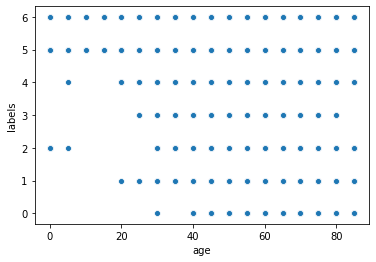

In [62]:
sns.scatterplot('age','labels',data=df)

#### From the plot above we can see that skin cancer types 0 (Melanocytic Nevi), 1 (Dermatofibroma), 3 (Basal Cell Carcinoma) and 5 (Vascular Lesions) are not as prevelant in patients below 20 years old
#### Now to plot sex-wise distribution of skin cancer lesion types

/home/hasib/.local/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


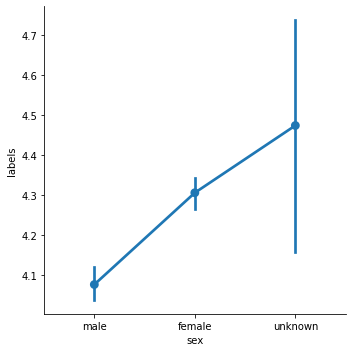

In [64]:
sns.factorplot('sex','labels',data=df)